In [ ]:
#References
# https://www.thepythoncode.com/article/using-speech-recognition-to-convert-speech-to-text-python
# https://towardsdatascience.com/audio-deep-learning-made-simple-automatic-speech-recognition-asr-how-it-works-716cfce4c706

# **Get Text from Audio**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install SpeechRecognition moviepy

     |████████████████████████████████| 32.8MB 92kB/s 


In [ ]:
pip install Pydub pydub

In [ ]:
import speech_recognition as sr
import moviepy.editor as mp

clip = mp.VideoFileClip(r"/content/drive/MyDrive/KunFYP/video 14.mp4")
clip.audio.write_audiofile(r"/content/drive/MyDrive/KunFYP/audio14.wav")


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1531904/45929032 bytes (3.3%)4341760/45929032 bytes (9.5%)7356416/45929032 bytes (16.0%)10412032/45929032 bytes (22.7%)13066240/45929032 bytes (28.4%)15843328/45929032 bytes (34.5%)18661376/45929032 bytes (40.6%)21282816/45929032 bytes (46.3%)24092672/45929032 bytes (52.5%)27009024/45929032 bytes (58.8%)29622272/45929032 bytes (64.5%)32243712/45929032 bytes (70.2%)3

100%|██████████| 68940/68940 [00:41<00:00, 1656.79it/s]


[MoviePy] Done.


In [ ]:
# importing libraries 
import speech_recognition as sr 
import csv
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.utils import make_chunks

# create a speech recognition object
r = sr.Recognizer()

textArr = []

# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    audio_size = 10 * 1000
    chunks = make_chunks(sound, audio_size)
    #chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
    #    min_silence_len = 700,
    #    # adjust this per requirement
    #    silence_thresh = sound.dBFS-5,
    #    # keep the silence for 1 second, adjustable as well
    #    keep_silence=700,
    #)
    #folder_name = "/content/drive/MyDrive/KunFYP/audio_dataset"
    folder_name = "/content/drive/MyDrive/KunFYP/audio_dataset2"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)

    #get index to start from
    person = 'A' #A=Armughan, B = Abdul Mueez, C = Saad
    numbering_start = 0
    
    #numbering_path = "/content/drive/MyDrive/KunFYP/audio_numbering.csv"
    numbering_path = "/content/drive/MyDrive/KunFYP/audio_numbering2.csv"
    with open(numbering_path) as csv_file:
      csv_reader = csv.reader(csv_file)
      for row in csv_reader:
        if row[0] == person:
          numbering_start = int(row[1])
          break
    
    print(path)


    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, person+f"{i+numbering_start}.wav")
        audio_chunk.export(chunk_filename, format="wav")
    #     # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened, language = "ur-PK")
            except sr.UnknownValueError as e:
                print("Error at line "+str(i+numbering_start))
                txt = []
                txt.append(f"{i+numbering_start}.wav")
                txt.append("سمجھ نہیں آئی")
                textArr.append(txt)
            else:
                txt = []
                txt.append(f"{i+numbering_start}.wav")
                txt.append(text)
                textArr.append(txt)

    print("video conversion done at line "+f"{i+numbering_start}")

    #append to csv file
    #with open("/content/drive/MyDrive/KunFYP/text_dataset.csv",'a',newline='') as file:
    # with open("/content/drive/MyDrive/KunFYP/text_dataset2.csv",'a',newline='') as file:
    #   writer = csv.writer(file)
    #   for x in range(len(textArr)):
    #     writer.writerow([textArr[x][0],textArr[x][1]])

    # #make changes to numbering file
    # number_data = []
    # with open(numbering_path) as csv_file:
    #   csv_reader = csv.reader(csv_file)
    #   for row in csv_reader:
    #     dt = []
    #     dt.append(row[0])
    #     if row[0] == person:
    #       dt.append(int(row[1])+len(textArr))
    #     else:
    #       dt.append(int(row[1]))
    #     number_data.append(dt)

    # with open(numbering_path,'w',newline='') as file:
    #   writer = csv.writer(file)
    #   for x in range(len(number_data)):
    #     writer.writerow([number_data[x][0],number_data[x][1]])
    
     
    return

path = "/content/drive/MyDrive/KunFYP/audio2.wav"
get_large_audio_transcription(path)

/content/drive/MyDrive/KunFYP/audio2.wav
video conversion done at line 68


#**Clean and Correct Dataset**


In [ ]:
import numpy as np
import pandas as pd
import csv
import nltk
nltk.download('punkt') # one time execution
import re

#read dataset from csv
path = "/content/drive/MyDrive/KunFYP/text_dataset2.csv"

dataset = []
with open(path) as csv_file:
  csv_reader = csv.reader(csv_file)
  for row in csv_reader:
    data = []
    s = row[0]
    s2 = row[1]
    data.append(s)
    data.append(s2)
    dataset.append(data)

#add alphabet
collector = 0
for x in range(len(dataset)):
  if dataset[x][0] == "1.wav":
    collector+= 1
  if collector == 1:
    dataset[x][0] = "A"+dataset[x][0]
  elif collector == 2:
    dataset[x][0] = "B"+dataset[x][0]
  elif collector == 3:
    dataset[x][0] = "C"+dataset[x][0]

dataset2 = []
#remove sentences not understood
for x in range(len(dataset)):
  if dataset[x][1] != "سمجھ نہیں آئی":
    dataset2.append(dataset[x])

#count number of words on sentence length
short = 0
medium = 0
longs = 0

for x in range(len(dataset2)):
  if len(dataset2[x][1]) >= 0 and len(dataset2[x][1]) < 50:
    short+=1
  elif len(dataset2[x][1]) >= 50 and len(dataset2[x][1]) < 100:
    medium+=1
  else:
    longs+=1

print(f"short sentences: {short}, medium sentences: {medium}, long sentences: {longs}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
short sentences: 33, medium sentences: 310, long sentences: 458


In [ ]:

#save to new csv file, only short sentences in dataset
with open("/content/drive/MyDrive/KunFYP/text_dataset_improved2.csv",'w',newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["Filename", "Text"])
  for x in range(len(dataset2)):
    writer.writerow([dataset2[x][0],dataset2[x][1]])

# **Generate Spectrograms**

In [ ]:
import librosa

# Load the audio file
AUDIO_FILE = '/content/drive/MyDrive/KunFYP/audio_dataset2/A20.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

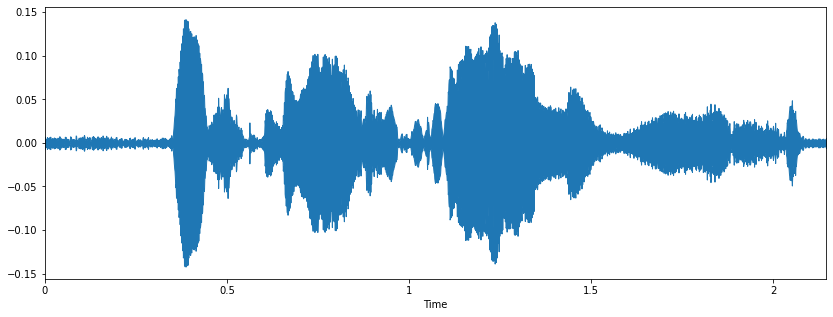

In [ ]:
import librosa.display
import matplotlib.pyplot as plt

# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

In [ ]:
from IPython.display import Audio
Audio(AUDIO_FILE)

In [ ]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (94683,) Sample rate  44100 Data type <class 'numpy.ndarray'>
[-0.00564575 -0.01753235 -0.01086426 -0.00393677  0.00726318  0.01921082
 -0.00437927 -0.03477478 -0.00511169  0.03804016  0.02023315 -0.01347351
 -0.01049805  0.00422668  0.00883484 -0.00067139 -0.01542664 -0.00462341
  0.01800537  0.01086426]


/usr/local/lib/python3.7/dist-packages/librosa/display.py:823: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


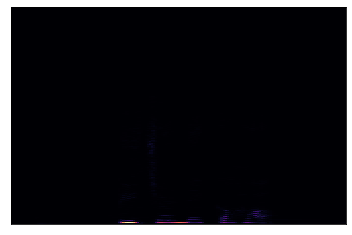

In [ ]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

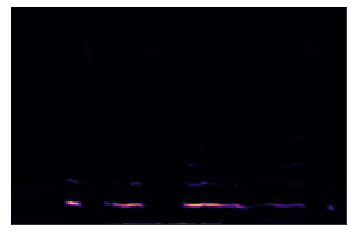

In [ ]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

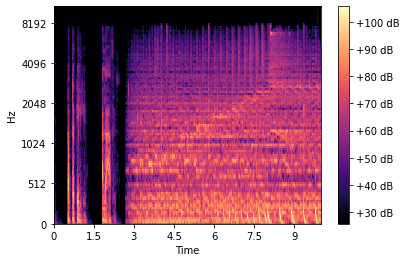

In [ ]:
import numpy as np

# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

# **libraries**

In [ ]:
#libraries

import tensorflow as tf
import keras.backend as K
from keras.models import Model
from keras.layers import Input
from keras.layers import TimeDistributed
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Lambda
from keras.layers import Dropout
from keras.regularizers import l2
from keras.initializers import random_normal
from keras.utils.conv_utils import conv_output_length
from keras.layers import GaussianNoise
from keras.callbacks import ModelCheckpoint,EarlyStopping

import numpy as np
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers.recurrent import SimpleRNN
from keras.layers import Dense, Activation, Bidirectional, Reshape,Flatten, Lambda, Input,\
    Masking, Convolution1D, BatchNormalization, GRU, Conv1D, RepeatVector, Conv2D,LSTM
from keras.optimizers import SGD, Adam
from keras.layers import ZeroPadding1D, Convolution1D, ZeroPadding2D,Bidirectional,Flatten,CuDNNGRU,Convolution2D, MaxPooling2D,MaxPooling1D, GlobalMaxPooling2D
from keras.layers import TimeDistributed, Dropout
from keras.layers.merge import add  # , # concatenate BAD FOR COREML
from keras.utils.conv_utils import conv_output_length
from keras.activations import relu
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import sklearn.preprocessing as i
from keras.utils.np_utils import to_categorical
from keras import models  
import random
import IPython.display as ipd

# **Model Creation** 

**Labels**

In [ ]:

import pandas as pd
from pathlib import Path
labels=[]
Files=[]
text=pd.read_csv("/content/drive/MyDrive/KunFYP/text_dataset_improved2.csv")
count=0
for i in text.values:      
        path = Path('/content/drive/MyDrive/KunFYP/audio_dataset2/'+i[0])
        if (path.is_file()==True and count!=5):
            Files.append(i[0])  
            labels.append(i[1])
            count+=1
            print("i")
print(len(Files))
print(len(labels))


i
i
i
i
i
5
5


**Spectrograms**


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import csv


# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
# Load the audio file

Audio_File = '/content/drive/MyDrive/KunFYP/audio_dataset2/'
paths=[]
counter=0
waves=[]

f = open('/content/drive/MyDrive/KunFYP/samples.csv', 'w')
writer = csv.writer(f)

for i in Files:
        path = Path(Audio_File+i)
        #paths.append(Audio_File+i)
        if (path.is_file()):
           samples, sample_rate = librosa.load(Audio_File+i, sr=None)
        #fig=plt.figure(figsize=(14, 5))
        #librosa.display.waveplot(samples, sr=sample_rate)
        #sgram = librosa.stft(samples)
        #librosa.display.specshow(sgram)
        # use the mel-scale instead of raw frequency
        #sgram_mag, _ = librosa.magphase(sgram)
        #mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
        #librosa.display.specshow(mel_scale_sgram)    
        # use the decibel scale to get the final Mel Spectrogram
        #mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
        #librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
        #plt.colorbar(format='%+2.0f dB')
           samples = librosa.resample(samples, sample_rate, 1000)
           waves.append(samples)
           writer.writerow(samples)
           print("i");
           print(i)
           print(samples);
         
f.close()



i
A1.wav
[ 0.          0.          0.         ... -0.12394881 -0.04326453
  0.07965658]
i
A2.wav
[-0.00348187 -0.12884158 -0.06680997 ...  0.0590983  -0.01366135
 -0.06060058]
i
A3.wav
[-0.04557588 -0.08246223  0.05584407 ...  0.11980364 -0.071463
 -0.05797739]
i
A4.wav
[ 0.02521249  0.15690207  0.00702249 ... -0.00189791 -0.00026853
  0.00136468]
i
A5.wav
[ 0.00237356  0.00443226  0.00223799 ... -0.01353438 -0.00554351
  0.01439434]


In [ ]:
import csv

# open the file in the write mode
#f = open('/content/drive/MyDrive/KunFYP/samples.csv', 'w')

# create the csv writer
writer = csv.writer(f)


from pathlib import Path
import librosa
waves=[]
Audio_File = '/content/drive/MyDrive/KunFYP/audio_dataset2/'
for i in Files:
        path = Path(Audio_File+i)
        if (path.is_file()):            
            samples, sample_rate = librosa.load(Audio_File+i, sr=None)
            samples = librosa.resample(samples, sample_rate, 1000)
            waves.append(samples)
            print(samples)
            #all_wave = np.array(all_wave).reshape(-1,8000,1)
            #writer.writerow(samples)
# write a row to the csv file


# close the file
f.close()            


[ 0.          0.          0.         ... -0.12394881 -0.04326453
  0.07965658]
[-0.00348187 -0.12884158 -0.06680997 ...  0.0590983  -0.01366135
 -0.06060058]
[-0.04557588 -0.08246223  0.05584407 ...  0.11980364 -0.071463
 -0.05797739]
[ 0.02521249  0.15690207  0.00702249 ... -0.00189791 -0.00026853
  0.00136468]
[ 0.00237356  0.00443226  0.00223799 ... -0.01353438 -0.00554351
  0.01439434]


In [ ]:
#import pandas as pd
#from pathlib import Path
#waves=[]
#test=pd.read_csv("/content/drive/MyDrive/KunFYP/samples.csv")

#for i in test.values:
#         waves.append(i)
   
#print(waves)

In [ ]:
print(np.array(waves).shape)

(5, 10000)


In [ ]:
#all_wave = np.array(waves).reshape(5,10000,1)
#print(np.array(waves).shape,y.shape)


In [ ]:
import sklearn.preprocessing as i
import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

label_enconder = i.LabelEncoder()
y = label_enconder.fit_transform(labels)

all_wave = np.array(waves).reshape(-1,10000,1)
print(y.shape)
print(all_wave.shape)

x_train, x_valid, y_train, y_valid = train_test_split(np.array(all_wave),np.array(y),test_size=0.2,random_state=777)

#print(np.array(all_wave))
#print("Data")
#print(y)
#print(waves) 

#print(len(all_wave))
#print(x_train)
#print(y)
print(y_train)

print(y_valid)
#print(len(x_train))
#print(np.array(all_wave).shape)


['ایک مرتبہ کا ذکر ہے کہ ایک قرآنی نام کی لڑکی اپنی امی کے ساتھ شہر میں رہا کرتی تھی وہ روز', 'اسکول جاتے ایک دن اس کی امی بیمار ہو گئی گھر پر اس کی امی کے علاوہ اور کوئی نہ تھا اس لئے اپنی امی کا', 'اسے ہی رکھنا پڑتا تھا اس وجہ سے وہ کافی دنوں سے سکول بہت دیر سے پہنچتی دیر سے آنے پر اس کو ٹیچر کو', 'قرآن سننا پڑتیں لیکن رانی ٹیچر سے کچھ نہ کہتی کسی سے کچھ بولے کہے بغیر گھر آجا', 'اور اپنی ماں کی خدمت میں لگ جاتی اگلے ہفتے جب رانی اسکول نہیں آئی تو کلاس کے بچوں نے سوچا رانی کوٹ']
[3 0 1 4 2]
(5,)
(5, 10000, 1)
[2 0 1 4]
[3]


In [ ]:
print(labels)
print(y)

['ایک مرتبہ کا ذکر ہے کہ ایک قرآنی نام کی لڑکی اپنی امی کے ساتھ شہر میں رہا کرتی تھی وہ روز', 'اسکول جاتے ایک دن اس کی امی بیمار ہو گئی گھر پر اس کی امی کے علاوہ اور کوئی نہ تھا اس لئے اپنی امی کا', 'اسے ہی رکھنا پڑتا تھا اس وجہ سے وہ کافی دنوں سے سکول بہت دیر سے پہنچتی دیر سے آنے پر اس کو ٹیچر کو', 'قرآن سننا پڑتیں لیکن رانی ٹیچر سے کچھ نہ کہتی کسی سے کچھ بولے کہے بغیر گھر آجا', 'اور اپنی ماں کی خدمت میں لگ جاتی اگلے ہفتے جب رانی اسکول نہیں آئی تو کلاس کے بچوں نے سوچا رانی کوٹ']
[3 0 1 4 2]


In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-z4hcg71c
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-z4hcg71c
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp37-none-any.whl size=101078 sha256=56feeaf8ee75ba5f3e648ac4db1113f1615c392f3f678b802c36e82433d09c54
  Stored in directory: /tmp/pip-ephem-wheel-cache-rkyr864a/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [ ]:
print(labels,len(labels))

['ایک مرتبہ کا ذکر ہے کہ ایک قرآنی نام کی لڑکی اپنی امی کے ساتھ شہر میں رہا کرتی تھی وہ روز', 'اسکول جاتے ایک دن اس کی امی بیمار ہو گئی گھر پر اس کی امی کے علاوہ اور کوئی نہ تھا اس لئے اپنی امی کا', 'اسے ہی رکھنا پڑتا تھا اس وجہ سے وہ کافی دنوں سے سکول بہت دیر سے پہنچتی دیر سے آنے پر اس کو ٹیچر کو', 'قرآن سننا پڑتیں لیکن رانی ٹیچر سے کچھ نہ کہتی کسی سے کچھ بولے کہے بغیر گھر آجا', 'اور اپنی ماں کی خدمت میں لگ جاتی اگلے ہفتے جب رانی اسکول نہیں آئی تو کلاس کے بچوں نے سوچا رانی کوٹ'] 5


In [ ]:


inputs = Input(shape=(10000,1))
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-3, center=True, scale=True)(inputs)
#First Conv1D layer
x = Conv1D(8,13, padding='valid', activation='relu', strides=1)(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)
#Second Conv1D layer
x = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)
#Third Conv1D layer
x = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-3, center=True, scale=True)(x)
x = Bidirectional(CuDNNGRU(128, return_sequences=True), merge_mode='sum')(x)
x = Bidirectional(CuDNNGRU(128, return_sequences=True), merge_mode='sum')(x)
x = Bidirectional(CuDNNGRU(128, return_sequences=False), merge_mode='sum')(x)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=1e-3, center=True, scale=True)(x)
#Flatten layer
x = Flatten()(x)
#Dense Layer 1
x = Dense(256, activation='relu')(x)

outputs = Dense(1, activation="softmax")(x)
model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10000, 1)]        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 10000, 1)          4         
_________________________________________________________________
conv1d (Conv1D)              (None, 9988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3329, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 3329, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3319, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1106, 16)          0     

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15, min_delta=0.0001) 
checkpoint = ModelCheckpoint('speech2text_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(4, 10000, 1)
(4,)
(1, 10000, 1)
(1,)


In [ ]:
hist = model.fit(
    x=x_train, 
    y=y_train,
    epochs=100, 
    callbacks=[early_stop, checkpoint], 
    batch_size=32, 
    validation_data=(x_valid,y_valid)
)

Epoch 1/100
1/1 [==============================] - 56s 56s/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 78ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 75ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 61ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 63ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 56ms/step - loss: 0.0000e+00 - acc

In [ ]:
from keras import models  
#model = models.load_model("speech2text_model.hdf5")
def s2t_predict(audio, shape_num=10000):
    prob = model.predict(audio.reshape(1,shape_num,1))
    index = np.argmax(prob[0])
    return y_train[index]

In [ ]:
import random
import IPython.display as ipd
index = random.randint(0,len(x_valid) - 1)
samples = x_valid[index].ravel()
#print("Audio:", classes[np.argmax(y_valid[index])])
#print("Predicted Text:", s2t_predict(samples))
ipd.Audio(samples, rate=1000)

In [ ]:
#samplerate = 16000
# the value below must be in seconds  
#duration = 1
#filename = 'recorded_audio.wav'
#print("start")
#mydata = sd.rec(int(samplerate * duration), samplerate=samplerate,
#    channels=1, blocking=True)
#print("end")
#sd.wait()
#sf.write(filename, mydata, samplerate)

In [ ]:
print(audio.shape)
print(audio_rate)

In [ ]:
audio, audio_rate = librosa.load('/content/drive/MyDrive/KunFYP/audio_dataset2/A1.wav', sr=16000)
audio_sample = librosa.resample(audio, audio_rate, 1000)
ipd.Audio(audio_sample,rate=1000)
#print("Predicted Text:", s2t_predict(audio_sample))
Data=s2t_predict(audio_sample)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: ignored

In [ ]:

counter=0
for i in y:
    if i==Data:
       print(labels[counter])      
    counter+=1   

اور اپنی ماں کی خدمت میں لگ جاتی اگلے ہفتے جب رانی اسکول نہیں آئی تو کلاس کے بچوں نے سوچا رانی کوٹ


# **Naive Bayes Model**

In [ ]:
pip install sklearn

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

sns.set() # use seaborn plotting style


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/KunFYP/intent_dataset2.csv')
df = shuffle(df)
df.reset_index(drop=True)
print(df.head(10))
# Get the text categories
text_categories = ['turn on light', 'turn off light', 'turn on fan', 'turn off fan', 'speed up fan', 'slow down fan', 'open door', 'close door', 'open window', 'close window']
# define the training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(df['Sentence'],df['Intent'], test_size = 0.10, random_state = 42)

             Sentence          Intent
483    فین آہستہ کردو   slow down fan
592     تیز کردیں فین    speed up fan
525  آہستہ کردو پنکھا   slow down fan
469    بند کرنا پنکھا    turn off fan
167       اوف کر لائٹ  turn off light
93          جل جا بتی   turn on light
383     فین اوف ہوجا     turn off fan
549  آہستہ ہوجا پنکھا   slow down fan
62         جل جا لائٹ   turn on light
33     بتی اون کردینا   turn on light


In [ ]:
print("We have {} unique classes".format(len(text_categories)))
print("We have {} training samples".format(len(X_train)))
print("We have {} test samples".format(len(X_test)))

We have 10 unique classes
We have 669 training samples
We have 75 test samples


In [ ]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# Train the model using the training data
clf = MultinomialNB().fit(X_train_tfidf, Y_train)
# Predict the categories of the test data

print(X_test)
print(df['Intent'][509])
pred = clf.predict(count_vect.transform(X_test))

correct = 0
print(len(Y_test))
print(type(Y_test))
count = 0
for x in Y_test:
  if x == pred[count]:
    correct+=1
  count+=1

Accuracy = correct/len(Y_test)
print(f"Accuracy on test data = {Accuracy * 100}%")

30          لائٹ جل جائیے
462        اوف ہوجا پنکھا
268       پنکھا چل جائیے 
724        کھول دیں کھڑکی
488         پنکھا تیز کر 
              ...        
337       اون ہوجائیں فین
497    پنکھا آہستہ کردیں 
193        اوف کردینا بتی
55         اون کردیں لائٹ
218         بند ہوجا لائٹ
Name: Sentence, Length: 75, dtype: object
slow down fan
75
<class 'pandas.core.series.Series'>
Accuracy on test data = 100.0%


**Test on a new Value**

In [ ]:
test_sentence = ["گھر کے دروازہ بند ہوجائیں","پنکا چالا دو"]

val = clf.predict(count_vect.transform([test_sentence[0]]))

print(val[0])


close door
